## Setup

## Installs

In [1]:
!pip install scikit-learn -q
!pip install pandas -q

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


## Imports

In [2]:
import matplotlib.pyplot as plt
from PIL import Image

from sklearn.metrics import classification_report
from sklearn.model_selection import  train_test_split

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from keras import utils

import os
from glob import glob

# Load Dataset

## Sample Images

In [3]:
path = 'data/'

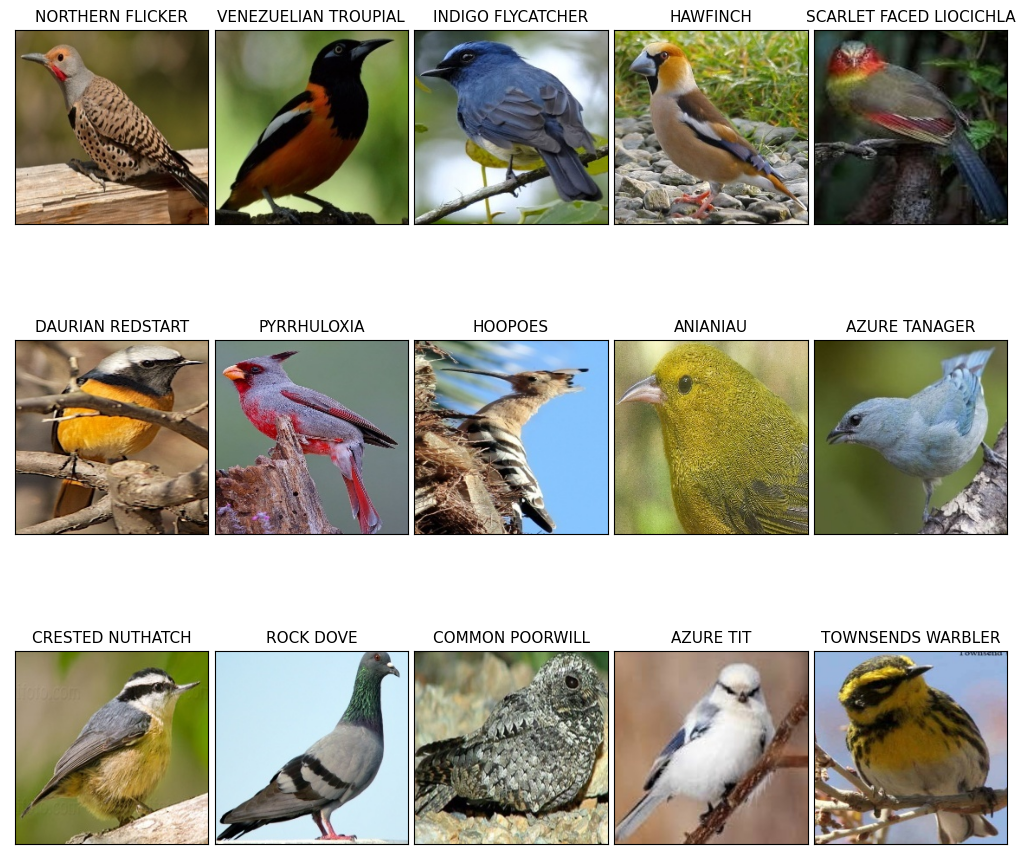

In [4]:
birds_classes = [] 
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(10, 10), subplot_kw={'xticks': [], 'yticks': []})

for (file, ax) in zip(os.listdir(path + "train/")[:15], enumerate(axes.flat)):
    
    # store bird name to classes names
    birds_classes.append(file)

    # plot random image from the file (same specie)
    all_jpg =  glob(path + f"train/{file}/*.jpg")
    random_jpg = np.random.choice(all_jpg)
    ax[1].imshow(Image.open(random_jpg))
    ax[1].set_title(file, fontsize = 11)

plt.tight_layout(pad = 0.1);
fig

## Create Generator (Data Augmentation)

In [5]:
generator = keras.preprocessing.image.ImageDataGenerator(
    rescale=1.0/255,
    horizontal_flip=True,
    vertical_flip=True
)

## Load Batches of Augmented Data

In [6]:
training = generator.flow_from_directory(
    path + 'train/',
    target_size=(224, 224),
    batch_size=32,
    classes=birds_classes,
    class_mode='categorical',
    seed=0,
)

validation = generator.flow_from_directory(
    path + 'valid/',
    target_size=(224, 224),
    batch_size=32,
    classes=birds_classes,
    class_mode='categorical',
    seed=0,
)

testing = generator.flow_from_directory(
    path + 'test/',
    target_size=(224, 224),
    batch_size=32,
    classes=birds_classes,
    class_mode='categorical',
    seed=0,
    shuffle=False
)

Found 2343 images belonging to 15 classes.
Found 75 images belonging to 15 classes.
Found 75 images belonging to 15 classes.


# Custom CNN Model

In [7]:
tf.config.list_logical_devices('GPU')

[LogicalDevice(name='/device:GPU:0', device_type='GPU')]

In [8]:
with tf.device('/device:GPU:0'):
    classifier_1 = Sequential()

    # hidden layer 1
    classifier_1.add(Conv2D(32, kernel_size=(5, 5), activation='relu', input_shape=(224,224,3), padding='same'))
    classifier_1.add(MaxPooling2D(pool_size=(2, 2)))
    classifier_1.add(BatchNormalization())
    classifier_1.add(Dropout(0.25))

    # hidden layer 2
    classifier_1.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
    classifier_1.add(MaxPooling2D(pool_size=(2, 2)))
    classifier_1.add(BatchNormalization())
    classifier_1.add(Dropout(0.25))

    # hidden layer 3
    classifier_1.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
    classifier_1.add(MaxPooling2D(pool_size=(2, 2)))
    classifier_1.add(BatchNormalization())
    classifier_1.add(Dropout(0.25))

    # hidden layer 4
    classifier_1.add(Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'))
    classifier_1.add(MaxPooling2D(pool_size=(2, 2)))
    classifier_1.add(BatchNormalization())
    classifier_1.add(Dropout(0.25))


    # hidden layer 5
    classifier_1.add(Conv2D(512, kernel_size=(3, 3), activation='relu', padding='same'))
    classifier_1.add(MaxPooling2D(pool_size=(2, 2)))


    classifier_1.add(Flatten())

    # output layer
    classifier_1.add(Dense(1024, activation='relu'))
    classifier_1.add(Dense(512, activation='relu'))
    classifier_1.add(Dense(15, activation='softmax'))

    classifier_1.compile(optimizer='adam',
                         loss='categorical_crossentropy',
                         metrics=['accuracy'])

classifier_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 112, 112, 32)     128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 112, 112, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0

In [9]:
history_1 = classifier_1.fit(training, epochs=150, validation_data=validation)

Epoch 1/150
74/74 [==============================] - 11s 82ms/step - loss: 12.9813 - accuracy: 0.1682 - val_loss: 2.7550 - val_accuracy: 0.0667
Epoch 2/150
74/74 [==============================] - 5s 72ms/step - loss: 2.1323 - accuracy: 0.3257 - val_loss: 3.1166 - val_accuracy: 0.0667
Epoch 3/150
74/74 [==============================] - 6s 78ms/step - loss: 1.8389 - accuracy: 0.3982 - val_loss: 3.2350 - val_accuracy: 0.1200
Epoch 4/150
74/74 [==============================] - 5s 72ms/step - loss: 1.5855 - accuracy: 0.4784 - val_loss: 2.6003 - val_accuracy: 0.1333
Epoch 5/150
74/74 [==============================] - 5s 72ms/step - loss: 1.3768 - accuracy: 0.5425 - val_loss: 2.9207 - val_accuracy: 0.1467
Epoch 6/150
74/74 [==============================] - 5s 74ms/step - loss: 1.1282 - accuracy: 0.6317 - val_loss: 2.0745 - val_accuracy: 0.2800
Epoch 7/150
74/74 [==============================] - 5s 70ms/step - loss: 1.0974 - accuracy: 0.6415 - val_loss: 1.8918 - val_accuracy: 0.2667
Epoc

74/74 [==============================] - 6s 76ms/step - loss: 0.0244 - accuracy: 0.9940 - val_loss: 0.5573 - val_accuracy: 0.8800
Epoch 116/150
74/74 [==============================] - 6s 75ms/step - loss: 0.0410 - accuracy: 0.9910 - val_loss: 0.5896 - val_accuracy: 0.8800
Epoch 117/150
74/74 [==============================] - 6s 75ms/step - loss: 0.0521 - accuracy: 0.9885 - val_loss: 0.7129 - val_accuracy: 0.9333
Epoch 118/150
74/74 [==============================] - 6s 76ms/step - loss: 0.0650 - accuracy: 0.9842 - val_loss: 0.6915 - val_accuracy: 0.8533
Epoch 119/150
74/74 [==============================] - 6s 74ms/step - loss: 0.1452 - accuracy: 0.9684 - val_loss: 0.7492 - val_accuracy: 0.8667
Epoch 120/150
74/74 [==============================] - 6s 74ms/step - loss: 0.0532 - accuracy: 0.9834 - val_loss: 0.4667 - val_accuracy: 0.9333
Epoch 121/150
74/74 [==============================] - 6s 74ms/step - loss: 0.1019 - accuracy: 0.9770 - val_loss: 0.7501 - val_accuracy: 0.8667
Epoch 

In [10]:
# Convert summary to DataFrame
model_summary = pd.DataFrame(history_1.history)

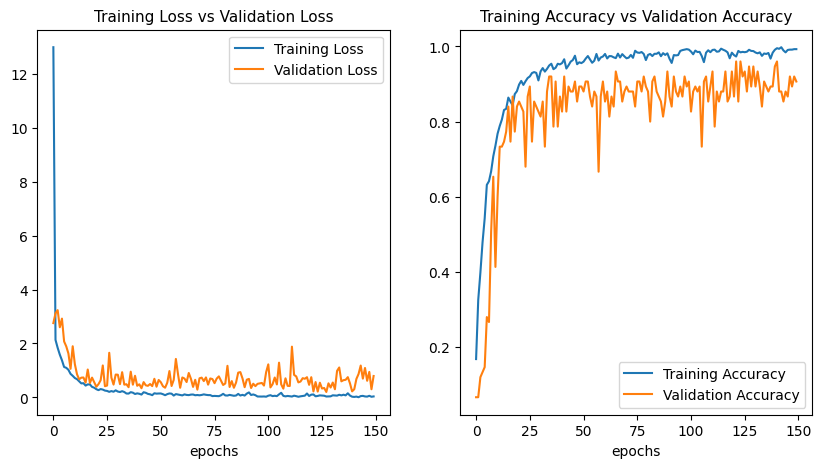

In [11]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10,5))
ax1.plot(model_summary['loss'], label = 'Training Loss')
ax1.plot(model_summary['val_loss'], label = 'Validation Loss')
ax1.set_title('Training Loss vs Validation Loss', fontsize = 11)
ax1.set_xlabel('epochs')
ax1.legend()

ax2.plot(model_summary['accuracy'], label = 'Training Accuracy')
ax2.plot(model_summary['val_accuracy'], label = 'Validation Accuracy')
ax2.set_title('Training Accuracy vs Validation Accuracy', fontsize = 11)
ax2.set_xlabel('epochs')
ax2.legend();

fig

## Save Model and Summary

In [12]:
classifier_1.save('models/classifier_1.h5')
model_summary.to_csv('model1_summary.csv')

# Load and Test Model

In [13]:
loaded_model = keras.models.load_model('models/classifier_1.h5')

In [14]:
loss, accuracy = loaded_model.evaluate(testing)
print('Loss', loss)
print('Accuracy', accuracy)

3/3 [==============================] - 0s 17ms/step - loss: 0.3644 - accuracy: 0.9333
Loss 0.3644046187400818
Accuracy 0.9333333373069763


In [15]:
img_pred = loaded_model.predict(testing)
predictions = np.argmax(img_pred,axis=1)

print(classification_report(testing.classes, predictions, target_names = birds_classes))

3/3 [==============================] - 0s 20ms/step
                         precision    recall  f1-score   support

       NORTHERN FLICKER       1.00      1.00      1.00         5
   VENEZUELIAN TROUPIAL       1.00      1.00      1.00         5
      INDIGO FLYCATCHER       0.83      1.00      0.91         5
               HAWFINCH       0.83      1.00      0.91         5
SCARLET FACED LIOCICHLA       1.00      0.80      0.89         5
       DAURIAN REDSTART       1.00      0.80      0.89         5
            PYRRHULOXIA       0.83      1.00      0.91         5
                HOOPOES       0.83      1.00      0.91         5
               ANIANIAU       1.00      0.80      0.89         5
          AZURE TANAGER       1.00      0.80      0.89         5
       CRESTED NUTHATCH       1.00      1.00      1.00         5
              ROCK DOVE       1.00      1.00      1.00         5
        COMMON POORWILL       1.00      1.00      1.00         5
              AZURE TIT       1.00   